In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

In [2]:
# Set the start and end date for fetching stock data
start_date = "2016-01-01"
end_date = datetime.datetime.today().strftime('2025-02-18')

# Get historical data from the stock from January 1, 2016 to end_date
amd = yf.Ticker("AMD")
amd_data = amd.history(start=start_date, end=end_date)

In [4]:
display(amd_data)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-01-04 00:00:00-05:00,2.770000,2.820000,2.630000,2.770000,32516800,0.0,0.0
2016-01-05 00:00:00-05:00,2.770000,2.800000,2.640000,2.750000,12972300,0.0,0.0
2016-01-06 00:00:00-05:00,2.660000,2.710000,2.470000,2.510000,23759400,0.0,0.0
2016-01-07 00:00:00-05:00,2.430000,2.480000,2.260000,2.280000,22203500,0.0,0.0
2016-01-08 00:00:00-05:00,2.360000,2.420000,2.100000,2.140000,31822400,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-10 00:00:00-05:00,108.440002,111.400002,108.150002,110.480003,34905400,0.0,0.0
2025-02-11 00:00:00-05:00,108.980003,113.070000,108.940002,111.099998,35033800,0.0,0.0
2025-02-12 00:00:00-05:00,109.519997,111.839996,109.059998,111.720001,25319700,0.0,0.0


<h2/> Data Preprocessing

In [6]:
amd_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2294 entries, 2016-01-04 00:00:00-05:00 to 2025-02-14 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2294 non-null   float64
 1   High          2294 non-null   float64
 2   Low           2294 non-null   float64
 3   Close         2294 non-null   float64
 4   Volume        2294 non-null   int64  
 5   Dividends     2294 non-null   float64
 6   Stock Splits  2294 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 143.4 KB


In [7]:
amd_data[amd_data.isnull().any(axis=1)]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,


In [9]:
amd_data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

<h2/> EDA and Visualization

<h4/> Descriptive Statistics

In [10]:
print("Descriptive Statistics:")
display(amd_data.describe())

Descriptive Statistics:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2294.000000,2294.000000,2294.000000,2294.000000,2.294000e+03,2294.0,2294.0
mean,65.520074,66.797302,64.155480,65.486787,6.257409e+07,0.0,0.0
std,51.609234,52.543276,50.533655,51.531341,3.473714e+07,0.0,0.0
min,1.810000,1.900000,1.750000,1.800000,5.591100e+06,0.0,0.0
25%,14.000000,14.182500,13.650000,13.957500,4.004910e+07,0.0,0.0
50%,57.394999,58.959999,56.309999,57.700001,5.423130e+07,0.0,0.0
75%,103.522501,106.047503,101.732498,103.902502,7.795780e+07,0.0,0.0
max,213.410004,227.300003,208.220001,211.380005,3.250584e+08,0.0,0.0


In [11]:
sns.set_style("darkgrid")       # Dark background with grid for contrast
sns.set_context("notebook")     # Optimized for Jupyter readability
sns.set_palette("husl")         # Vibrant, distinct colors
plt.rcParams['figure.figsize'] = (14, 6)  # Default figure size

<h4/> Time Series Plot

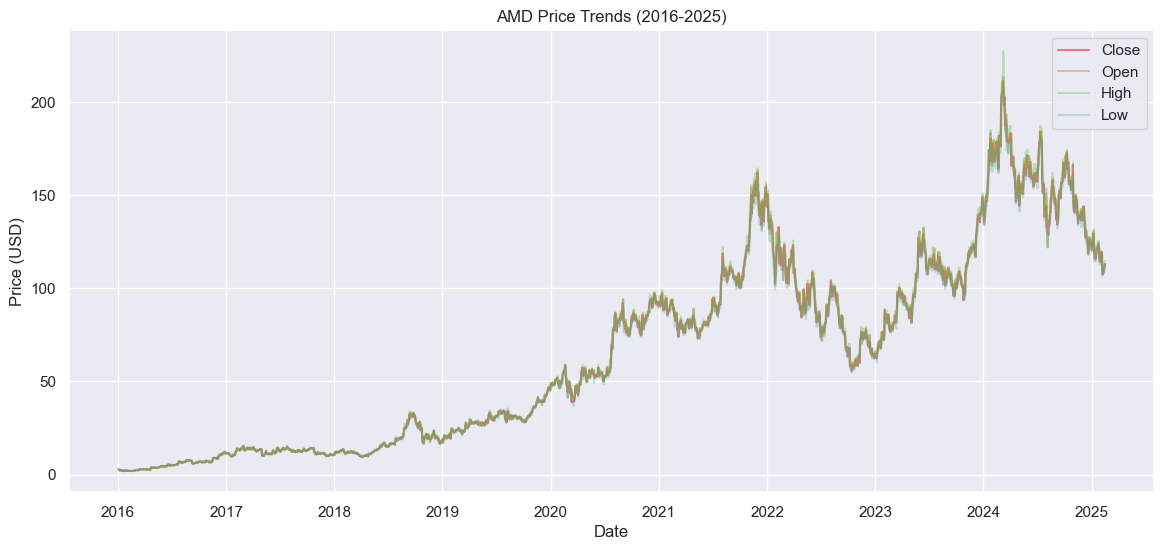

In [13]:
sns.lineplot(data=amd_data, x=amd_data.index, y='Close', label='Close')
sns.lineplot(data=amd_data, x=amd_data.index, y='Open', label='Open', alpha=0.5)
sns.lineplot(data=amd_data, x=amd_data.index, y='High', label='High', alpha=0.3)
sns.lineplot(data=amd_data, x=amd_data.index, y='Low', label='Low', alpha=0.3)
plt.title('AMD Price Trends (2016-2025)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

<h4/> Close Price (Last Year Zoom-in)

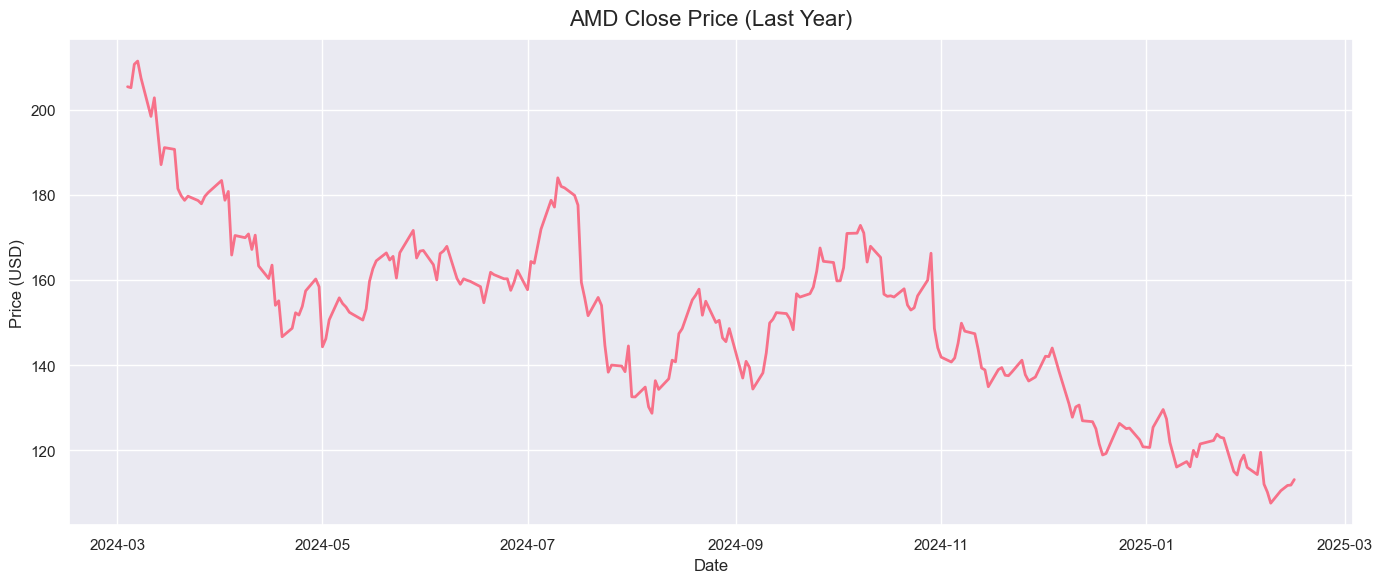

In [15]:
last_year = amd_data[amd_data.index >= '2024-03-04']

plt.figure()
sns.lineplot(data=last_year, x=last_year.index, y='Close', linewidth=2)
plt.title('AMD Close Price (Last Year)', fontsize=16, pad=10)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.tight_layout()
plt.show()

<h4/> Close Price Distribution

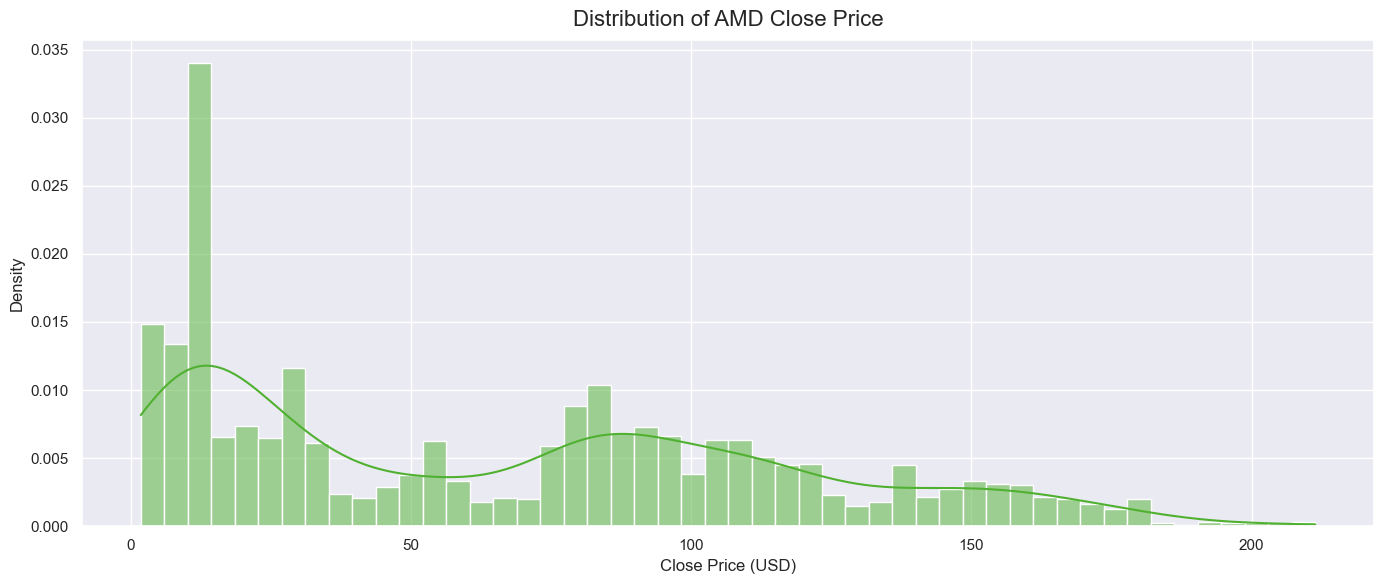

In [16]:
plt.figure()
sns.histplot(data=amd_data, x='Close', bins=50, kde=True, color=sns.color_palette("husl")[2], stat='density')
plt.title('Distribution of AMD Close Price', fontsize=16, pad=10)
plt.xlabel('Close Price (USD)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.tight_layout()
plt.show()

<h4/> ADF Test for Stationarity

In [17]:
adf_result = adfuller(amd_data['Close'].dropna())
print("ADF Test for Stationarity (Close):")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print("Stationary" if adf_result[1] < 0.05 else "Non-Stationary")

ADF Test for Stationarity (Close):
ADF Statistic: -1.2834604184191194
p-value: 0.6367048151287512
Non-Stationary


<h4/> Daily Returns Time Series Plot

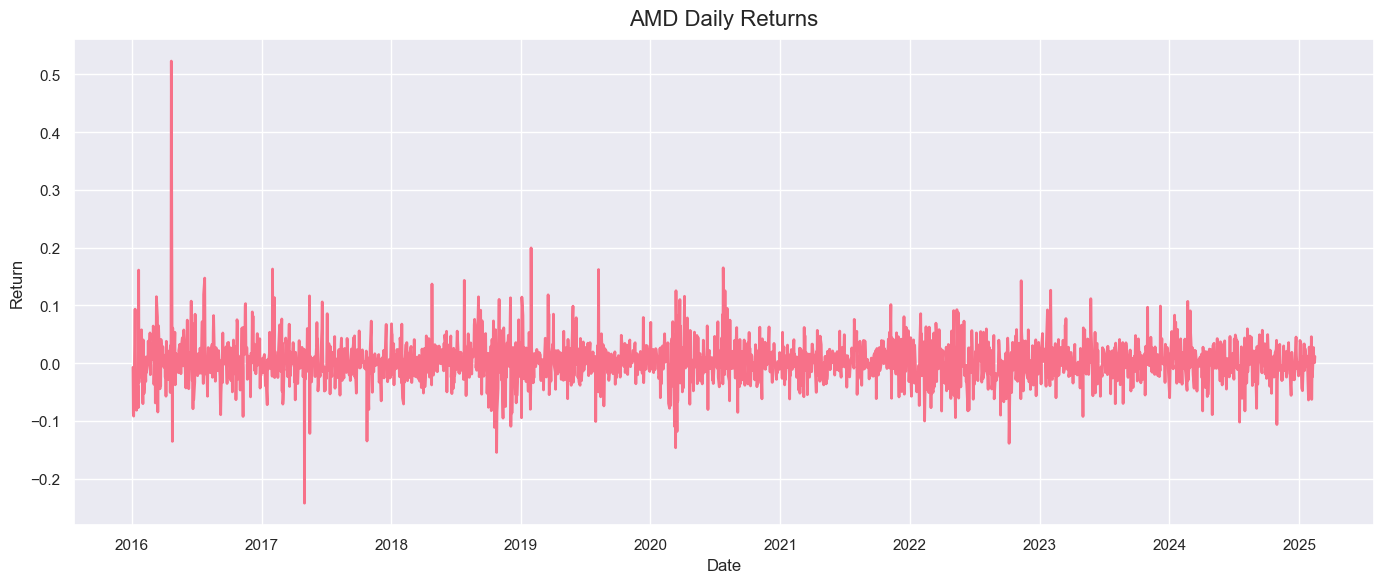

In [18]:
returns = amd_data['Close'].pct_change().dropna()
returns_df = pd.DataFrame({'Returns': returns}, index=returns.index)
plt.figure()
sns.lineplot(data=returns_df, x=returns_df.index, y='Returns', linewidth=2)
plt.title('AMD Daily Returns', fontsize=16, pad=10)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Return', fontsize=12)
plt.tight_layout()
plt.show()

<h4/> Correlation Matrix

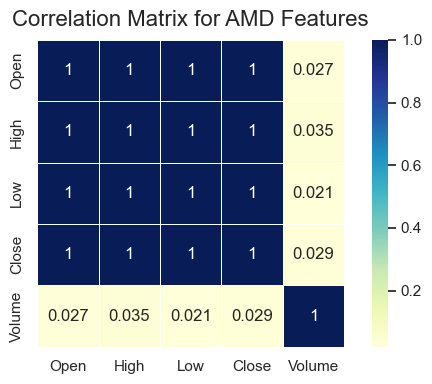

In [19]:
plt.figure(figsize=(6, 4))
sns.heatmap(amd_data[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='YlGnBu', 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix for AMD Features', fontsize=16, pad=10)
plt.tight_layout()
plt.show()

<h4/> Rolling Mean and Std Dev

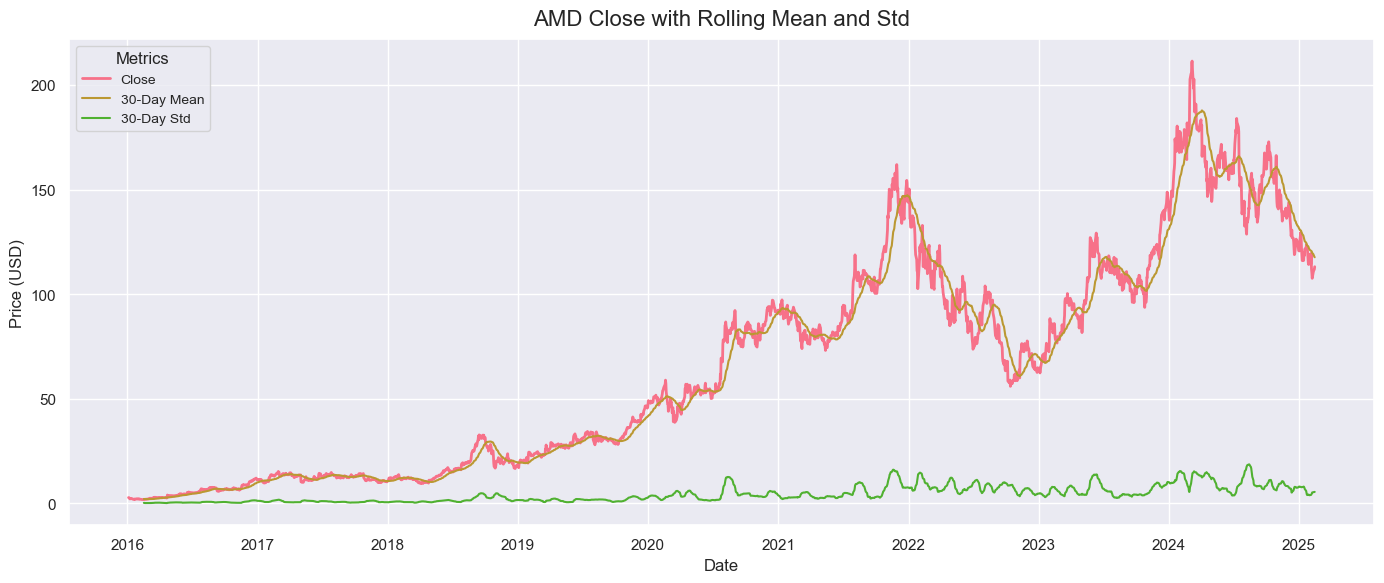

In [20]:
rolling_mean = amd_data['Close'].rolling(window=30).mean()
rolling_std = amd_data['Close'].rolling(window=30).std()
rolling_df = pd.DataFrame({'Close': amd_data['Close'], '30-Day Mean': rolling_mean, '30-Day Std': rolling_std})
plt.figure()
sns.lineplot(data=rolling_df, x=rolling_df.index, y='Close', label='Close', linewidth=2)
sns.lineplot(data=rolling_df, x=rolling_df.index, y='30-Day Mean', label='30-Day Mean', linewidth=1.5)
sns.lineplot(data=rolling_df, x=rolling_df.index, y='30-Day Std', label='30-Day Std', linewidth=1.5)
plt.title('AMD Close with Rolling Mean and Std', fontsize=16, pad=10)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend(title='Metrics', fontsize=10)
plt.tight_layout()
plt.show()